<a href="https://colab.research.google.com/github/acastellanos-ie/NLP-MBD-EN/blob/main/ir_practice/Information%20Retrieval%20Practice%20Solution%20-%20extended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Configuration

**Execute this steps to configure the Google Colab environment in order to execute this notebook. It is not required if you are executing it locally and you have properly configured your local environment according to what explained in the Github Repository.**

In [1]:
# @title Colab Setup

repository_name = "NLP-MBD-EN"
repository_url = 'https://github.com/acastellanos-ie/' + repository_name

print("### Cloning the Repository ###")
! git clone $repository_url
print()

print("### Installing requirements ###")
! pip3 install -Uqqr $repository_name/ir_practice/requirements.txt

### Cloning the Repository ###
Cloning into 'NLP-MBD-EN'...
remote: Enumerating objects: 4528, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 4528 (delta 50), reused 7 (delta 7), pack-reused 4447 (from 3)
Receiving objects: 100% (4528/4528), 14.84 MiB | 16.69 MiB/s, done.
Resolving deltas: 100% (180/180), done.

### Installing requirements ###
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.0/718.0 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.6/340.6 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

Everything is set up properly! You can now move on to the practice code.

I do recommend you to restart the environment at this point to ensure that Google Colab is aware of the installed packages and their configuration (see image below).

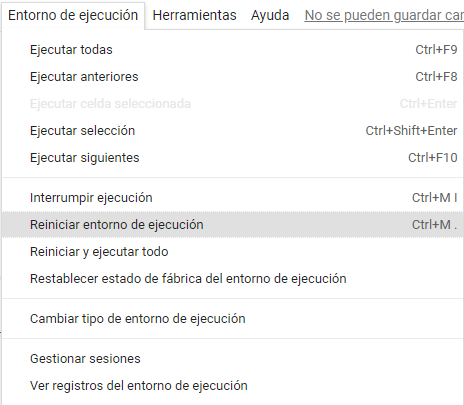

Now you have everything you need to execute the code in Colab

# Information Retrieval Practice

Elasticsearch is an open-source distributed search server built on top of Apache Lucene, offering a swift pathway to build applications equipped with full-text search capabilities.

In this practice, we will first ensure a smooth installation of Elasticsearch, followed by exploring how to query Elasticsearch via Python. Moving forward, a hands-on demonstration on indexing and searching with Elasticsearch will provide a practical understanding of creating an inverted index of sample documents and utilizing Elasticsearch query grammar for document retrieval.

The exercise extends to evaluating the retrieval results with the `trec_eval` evaluation program, which stands as a standard for evaluating search engines with test collections. This evaluation phase is crucial as it provides insights into the effectiveness of the retrieval system.

Further, we will delve into improving the index by tuning the index setting to include some Natural Language Processing (NLP) techniques like stemming and stopwords removal. Additionally, exploring different analyzers and similarity measures like BM25 will provide a broader understanding of how Elasticsearch can be optimized for better search performance.

By the end of this practice, a thorough understanding of Elasticsearch’s capabilities in Information Retrieval, and how various configurations and settings can be tuned to enhance search performance will be attained.


## Install Elastic Search

The ElasticSearch installation is pretty straightforward. First, we need to download and extract the package

In [4]:
# @title Donwnload and extract the package

!wget https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-7.15.0-linux-x86_64.tar.gz
!tar -xzf elasticsearch-7.15.0-linux-x86_64.tar.gz

--2025-04-01 09:11:02--  https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-7.15.0-linux-x86_64.tar.gz
Resolving artifacts.elastic.co (artifacts.elastic.co)... 34.120.127.130, 2600:1901:0:1d7::
Connecting to artifacts.elastic.co (artifacts.elastic.co)|34.120.127.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 349270587 (333M) [application/x-gzip]
Saving to: ‘elasticsearch-7.15.0-linux-x86_64.tar.gz’

elasticsearch-7.15. 100%[===================>] 333.09M  14.8MB/s    in 24s     

2025-04-01 09:11:27 (13.7 MB/s) - ‘elasticsearch-7.15.0-linux-x86_64.tar.gz’ saved [349270587/349270587]



In [15]:
# @title Install extracted package

! apt-get install openjdk-11-jre-headless -qq > /dev/null
! sudo chown -R daemon:daemon elasticsearch-7.15.0/
! sudo chown -R daemon:daemon elasticsearch-7.15.0/

Now we can execute the ElasticSearch binary. This will launch a local ElasticSearch server that is listening for petitions in the 9200 port

In [65]:
%%bash --bg

sudo -H -u daemon elasticsearch-7.15.0/bin/elasticsearch

We need to wait around 30 seconds to give time to ElasticSearch to open the server. After that we can validate that ElasticSearch is running and listening petitions in the expected port

In [68]:
%%bash

curl -sX GET "localhost:9200/"

{
  "name" : "48906e154ee4",
  "cluster_name" : "elasticsearch",
  "cluster_uuid" : "GsXxC2BDRxOvJEJWRWLXHQ",
  "version" : {
    "number" : "7.15.0",
    "build_flavor" : "default",
    "build_type" : "tar",
    "build_hash" : "79d65f6e357953a5b3cbcc5e2c7c21073d89aa29",
    "build_date" : "2021-09-16T03:05:29.143308416Z",
    "build_snapshot" : false,
    "lucene_version" : "8.9.0",
    "minimum_wire_compatibility_version" : "6.8.0",
    "minimum_index_compatibility_version" : "6.0.0-beta1"
  },
  "tagline" : "You Know, for Search"
}


## Querying Elastic Search via Python

To make queries to ElasticSearch you can directly query the server endpoint via REST. However, we can make it easier via the the `elasticsearch-py` Python library. This library provides a wrapper for the REST endpoint that will allow us to query the server form Python.

In case you have not yet installed the libraries, you can execute the following code

In [5]:
! pip install -Uqqq elasticsearch-dsl elasticsearch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.2 MB/s eta 0:00:00


In [20]:
import warnings
warnings.filterwarnings('ignore')

from elasticsearch import Elasticsearch
from elasticsearch_dsl import Search, Q, Index
from pprint import pprint

# Exercise 0: Indexing and Searching Demo for ElasticSearch

Now it's time to run some demo program. In this practice, we will create inverted index of sample documents (indexing) and then use Elasticsearch query grammar to search documents (searching).

### Useful functions

Functions to facilitate the reading of the dataset

In [7]:
import os, io
from collections import namedtuple

Doc = namedtuple('Doc', 'filename path text')

def read_doc(doc_path, encoding):
    '''
        reads a document from path
        input:
            - doc_path : path of document
            - encoding: encoding
        output: =>
            - doc: instance of Doc namedtuple
    '''
    filename = doc_path.split('/')[-1]
    fp = io.open(doc_path, 'r', encoding = encoding)
    text = fp.read().strip()
    fp.close()
    return Doc(filename = filename, text = text, path = doc_path)

def read_dataset(path, encoding = "ISO-8859-1"):
    '''
        reads multiple documents from path
        input:
            - doc_path : path of document
            - encoding: encoding
        output: =>
            - docs: instances of Doc namedtuple returned as generator
    '''
    for root, dirs, files in os.walk(path):
        for doc_path in files:
            yield read_doc(root + '/' + doc_path, encoding)

Setting up the connector

 To index the documents, we first need to make a connection to **Elasticsearch**.

In [21]:
es_conn = Elasticsearch(["http://localhost:9200"])

if es_conn.ping():
    print("ElasticSearch is running")
else:
    print("ElasticSearch is not running")

ElasticSearch is running


## Indexing

We will try to index the sample documents in `./sample_documents`.

Before we index the documents, we first need to define the **configuration of elasticsearch**. During this process, you can define basic configuration of indexer such as tokenizer, stemmer, lemmatizer, and also define which search algorithm elasticsearch will use for search.

Below code shows a simple configuration settings for this demo.
The configuration tells elasticsearch that our document `doc` will have three fields `filename`, `path`, and `text`, and we will use `text` field for search. `my_analyzer` will be used to parse the `text` field, and `my_analyzer` will also be used as a search analyzer, which will parse search queries later on. `index:False` in `filename` and `path` fields tell elasticsearch that we will not index these two fields, therefore, we cannot search these two fields with queries.

The detailed documentation of analyzer can be found [here](https://www.elastic.co/guide/en/elasticsearch/reference/current/analysis.html).

`"similarity": "boolean"` in `text` field will let elasticsearch know that we will use a boolean search algorithm to search `text` field. The detailed documentation of search algorithms can be found [here](https://www.elastic.co/guide/en/elasticsearch/reference/current/search.html)  and [here](https://www.elastic.co/guide/en/elasticsearch/guide/master/search-in-depth.html).


In [22]:
# configuration for indexing
settings = {
  "mappings": {
      "properties": {
        "filename": {
          "type": "keyword",
          "index": False,
        },
        "path": {
          "type": "keyword",
          "index": False,
        },
        "text": {
          "type": "text",
          "similarity": "boolean",
          "analyzer": "my_analyzer",
          "search_analyzer": "my_analyzer"
        }
      }
  },
  "settings": {
    "analysis": {
      "analyzer": {
        "my_analyzer": {
          "filter": [
            "lowercase","stop"
          ],
          "type": "custom",
          "tokenizer": "whitespace",
          "char_filter": ["my_char_filter"]
        }
      },
      "char_filter": {
        "my_char_filter": {
          "type": "html_strip",
          "escaped_tags": ["b"]
        }
      }
    }
  }
}

Now we will retrieve `sample documents` and indexing them into `INDEX_NAME` index. To that end, the following 2 functions will help you in the creation of the index and the indexing of the documents.


In [23]:
ES_HOSTS = ['http://localhost:9200']
INDEX_NAME = 'sample_index'
DOCS_PATH = repository_name +'/ir_practice/practice_data/sample_documents'

def create_index(es_conn, index_name, settings):
    '''
        create index structure in elasticsearch server.
        If index_name exists in the server, it will be removed, and new index will be created.
        input:
            - es_conn: elasticsearch connection object
            - index_name: name of index to create
            - settings: settings and mappings for index to create
        output: =>
            - None
    '''
    if es_conn.indices.exists(index = index_name):
        es_conn.indices.delete(index = index_name)
        print('index `{}` deleted'.format(index_name))
    es_conn.indices.create(index = index_name, body = settings)
    print('index `{}` created'.format(index_name))

def build_index(es_conn, dataset, index_name, settings, DOC_TYPE='doc'):
    '''
        build index from a collection of documents
        input:
            - es_conn: elasticsearch connection object
            - dataset: iterable, collection of namedtuple Doc objects
            - index_name: name of the index where the documents will be stored
            - DOC_TYPE: type signature of documents
    '''
    # create the index if it doesn't exist
    create_index(es_conn = es_conn, index_name = index_name, settings=settings)
    counter_read, counter_idx_failed = 0, 0 # counters

    # retrive & index documents
    for doc in dataset:
        res = es_conn.index(
            index = index_name,
            id = doc.filename,
            body = doc._asdict())
        counter_read += 1

        if res['result'] != 'created':
            conter_idx_failed += 1
        elif counter_read % 500 == 0:
            print('indexed {} documents'.format(counter_read))

    print('indexed {} docs to index `{}`, failed to index {} docs'.format(
        counter_read,
        index_name,
        counter_idx_failed
    ))

    # refresh after indexing
    es_conn.indices.refresh(index=index_name)



In [24]:
dataset = read_dataset(DOCS_PATH)
build_index(es_conn, dataset, INDEX_NAME, settings)

index `sample_index` created
indexed 5 docs to index `sample_index`, failed to index 0 docs


We successfully created an inverted index for the sample documents in `./sample/documents`. It's time to search the documents with some queries.

## Searching

### Full-Text Search

The two most important aspects of full-text search are as follows:

##### Relevance

>The ability to rank results by how relevant they are to the given query, whether relevance is calculated using TF/IDF (see [What Is Relevance?](https://www.elastic.co/guide/en/elasticsearch/guide/master/relevance-intro.html)), proximity to a geolocation, fuzzy similarity, or some other algorithm.

##### Analysis

>The process of converting a block of text into distinct, normalized tokens (see [Analysis and Analyzers](https://www.elastic.co/guide/en/elasticsearch/guide/master/analysis-intro.html) in order to (a) create an inverted index and (b) query the inverted index.

#### Term-Based Versus Full-Text

Two types of text query:

##### Term-based

Queries like the term or fuzzy queries are low-level queries that have no analysis phase. They operate on a single term. A term query for the term Foo looks for that exact term in the inverted index and calculates the TF/IDF relevance _score for each document that contains the term.

##### Full-text queries

Queries like the match or query_string queries are high-level queries that understand the mapping of a field:

* If you use them to query a date or integer field, they will treat the query string as a date or integer, respectively.

* If you query an exact value (not_analyzed) string field, they will treat the whole query string as a single term.

* But if you query a full-text (analyzed) field, they will first pass the query string through the appropriate analyzer to produce the list of terms to be queried.

Once the query has assembled a list of terms, it executes the appropriate low-level query for each of these terms, and then combines their results to produce the final relevance score for each document.

#### The match Query

We will perform now different types of queries.

First, a query with a single term

In [ ]:
s = Search(using=es_conn, index="sample_index")
s = s.query("match", text={"query": "obama"})
res = s.execute()

for hit in res:
    print(hit.filename, hit.text[:100], '... - Score:', hit.meta.score)
    print()

doc5.txt John Sidney McCain III (born August 29, 1936) is the senior United States Senator from Arizona. He w ... - Score: 1.0

doc2.txt Michelle LaVaughn Robinson Obama (born January 17, 1964) is the wife of the forty-fourth President o ... - Score: 1.0

doc1.txt Barack Hussein Obama II (born August 4, 1961) is the 44th and current President of the United States ... - Score: 1.0

doc3.txt Joseph Robinette "Joe" Biden, Jr. (born November 20, 1942) is the 47th and current Vice President of ... - Score: 1.0



#### Multiword Queries

Obviously, we can search on more than one word at a time:

In [ ]:
s = Search(using=es_conn, index="sample_index")
s = s.query("match", text={"query":    "Obama Hillary"})
res = s.execute()

for hit in res:
    print(hit.filename, hit.text[:200], '... - Score:', hit.meta.score)
    print()

doc1.txt Barack Hussein Obama II (born August 4, 1961) is the 44th and current President of the United States, the first African American to hold the office. He served as the junior United States Senator from  ... - Score: 2.0

doc4.txt Hillary Diane Rodham Clinton (born October 26, 1947) is the 67th United States Secretary of State, serving within the administration of President Barack Obama. She was a United States Senate from New  ... - Score: 1.0

doc5.txt John Sidney McCain III (born August 29, 1936) is the senior United States Senator from Arizona. He was the Republican nominee for president in the 2008 United States election.

McCain followed his fat ... - Score: 1.0

doc2.txt Michelle LaVaughn Robinson Obama (born January 17, 1964) is the wife of the forty-fourth President of the United States, Barack Obama, and is the first African-American First Lady of the United States ... - Score: 1.0

doc3.txt Joseph Robinette "Joe" Biden, Jr. (born November 20, 1942) is the 47th and curr

The important thing is: any document whose title field contains at least one of the specified terms will match the query. The more terms that match, the more relevant the document.

But what happens if I want both terms appearing in the document.

In [ ]:
s = Search(using=es_conn, index="sample_index")
s = s.query("match", text={
    "query":    "Obama Hillary",
    "operator": "and"})
res = s.execute()

for hit in res:
    print(hit.filename, hit.text, '... - Score:', hit.meta.score)
    print()


doc1.txt Barack Hussein Obama II (born August 4, 1961) is the 44th and current President of the United States, the first African American to hold the office. He served as the junior United States Senator from Illinois from January 2005 until he resigned after his election to the presidency in November 2008.

Obama is a graduate of Columbia University and Harvard Law School, where he was the president of the Harvard Law Review. He was a community organizer in Chicago before earning his law degree. He worked as a civil rights attorney in Chicago and also taught constitutional law at the University of Chicago Law School from 1992 to 2004.

Obama served three terms in the Illinois Senate from 1997 to 2004. Following an unsuccessful bid for a seat in the U.S. House of Representatives in 2000, Obama ran for United States Senate in 2004. His victory, from a crowded field, in the March 2004 Democratic primary raised his visibility. His prime-time televised keynote address at the Democratic Nat

And now containing a term but NOT the other.

In [ ]:
# Boolean Query "Obama BUT Hillary"
s = Search(using=es_conn, index="sample_index")
s = s.query("bool",
            must = [Q('match', text="hillary")],
            must_not = [Q('match', text="obama")]
           )

res = s.execute()

for hit in res:
    print(hit.filename, hit.text[:100], '... - Score:', hit.meta.score)
    print()

doc4.txt Hillary Diane Rodham Clinton (born October 26, 1947) is the 67th United States Secretary of State, s ... - Score: 1.0



# Exercise 1: Evaluating Results

We will show how the retrieved result can be evaluated by **trec_eval** evaluation program.

**trec_eval** is the standard software for evaluating search engines with test collections.

First, we need to check the `government` folder which contains three things:

- A set of documents needed to be indexed, in the *documents* directory.
    
- A set of queries, also called 'topics', in *topics/gov.topics* file. The format of **.topic* file is "query_id query_terms". For example, the first line of 'air.topics' file is
    
    `1 mining gold silver coal`
    
    which means that the ID of query is *01* and the corresponding query is *mining gold silver coal*.

- A set of judgements, saying which documents are relevant for each query, in the *qrels/gov.qrels* file. The format of **.qrels* file is "query_id 0 document_name binary_relevance". For example, the first line of 'air.qrels' is
    
    `1 0 G00-00-0681214 0`
    
    which means that the document `G00-00-0681214` is not relevant to the given query id *01*. The binary relevance is *1* if the file is relevant to the query, otherwise *0*. Please ignore the second argument *0* as it is always *0*.

## Create new index

In the previous exercise, we have created the index (inverted-index) of five sample documents. In this one, you will create a new index with the documents in `government/documents` folder .

To build a new index, you first need to create a new index. Note that `EVAL_INDEX_NAME` should be changed in order to build separate index for the documents in `government/documents`.

After creating the new configuration file, now your job is to create the new index reusing the code in the previous exercise.

In [25]:
settings = {
  "mappings": {
      "properties": {
        "filename": {
          "type": "keyword",
          "index": False,
        },
        "path": {
          "type": "keyword",
          "index": False,
        },
        "text": {
          "type": "text",
          "similarity": "boolean",
          "analyzer": "my_analyzer",
          "search_analyzer": "my_analyzer"
        }
      }
  },
  "settings": {
    "analysis": {
      "analyzer": {
        "my_analyzer": {
          "filter": [
            "stop"
          ],
          "char_filter": [
            "html_strip"
          ],
          "type": "custom",
          "tokenizer": "whitespace"
        }
      }
    }
  }
}

### Exercise 1.1: Create the new index

You can reuse the previous code

In [ ]:
EVAL_INDEX_NAME = 'government'
EVAL_DOCS_PATH = repository_name +'/ir_practice/practice_data/government/documents'

dataset = read_dataset(EVAL_DOCS_PATH)
build_index(es_conn, dataset, EVAL_INDEX_NAME, settings)

index `government` created
indexed 500 documents
indexed 1000 documents
indexed 1500 documents
indexed 2000 documents
indexed 2500 documents
indexed 3000 documents
indexed 3500 documents
indexed 4000 documents
indexed 4078 docs to index `government`, failed to index 0 docs


### Exercise 1.2. Read topics and produce result file

Read topics (queries) from a file (`government/topics/gov.topics`) and then search documents indexed by **Elasticsearch**. You may choose one of search algorithms.

Produce result file (e.g., *retrieved.txt*) according to **trec_eval** standard output format:

`01 Q0 document1 0 1.23 my_IR_system1`

`01 Q0 document2 1 1.08 my_IR_system1`

where '01' is the query ID; ignore 'Q0'; 'documentX' is the name of the file; '0' (or '1' or some other integer number) is the rank of this result; '1.23' (or '1.08' or some other number) is the score of this result; and 'my_IR_system1' is the name for your retrieval system. In particular, note that the rank field will be ignored in **trec_eval**; internally ranks are assigned by sorting by the score field with ties broken deterministicly (using file name).

**Now here's your first job**

1. read `gov.topics` file line by line,
2. send query to the elastic search
3. write output according the the output format described above

To that end, I have prepared the following helper functions aimed at processing and handling data for an information retrieval system, specifically utilizing Elasticsearch. Here's a brief outline of each function:

1. **`read_topic_file`**:
   - Reads and processes multiple documents from a specified path.
   - Returns a list of tuples, each containing a presumed identifier and the corresponding text.

2. **`search`**:
   - Executes a search on an Elasticsearch index using a specified query string.
   - Returns a generator yielding tuples of filename and score for each hit in the search results.

3. **`write_trec_file`**:
   - Formats and writes the search results to a file in TREC Eval format, which is a standard format for evaluating information retrieval systems.
  
These functions collectively facilitate reading document data, executing searches on an Elasticsearch index, and formatting the search results for evaluation.


In [26]:
def read_topic_file(path, encoding = "ISO-8859-1"):
    '''
        reads multiple documents from path
        input:
            - doc_path : path of document
            - encoding: encoding
        output: =>
            - docs: instances of Doc namedtuple returned as generator
    '''
    for root, dirs, files in os.walk(path):
        for doc_path in files:
            filename = (root + '/' + doc_path)
            fp = io.open(filename, 'r', encoding = encoding)
            text = fp.readlines()
            fp.close()

    return [(t.split(" ")[0].strip(), " ".join(t.split(" ")[1:]).strip()) for t in text]

In [27]:
def search(query_string, es_conn, index_name, operator = "or"):
    '''
        searches for query_string with default search algorithm
        input:
            - query_string: a query
            - es_conn: elasticsearch connection
            - index_name: name of index
        output:
            - a generator of tuple (filename, score)

    '''
    res = es_conn.search(index = index_name, size = 100,
        body = {
            "_source": ["filename"],
            "query": {
                "match": {
                    "text":{
                        "query": query_string,
                        "operator" : operator
                    }
                }
            }
        }
    )
    for hit in res['hits']['hits']:
        filename = hit["_source"]["filename"]
        score = hit["_score"]
        yield (filename, score)



In [28]:
def write_trec_file(query, res, output_file):
    # formatter of searched result
    for ranking, match in enumerate(sorted(res, key = lambda x: -x[1])):
        output_file.write('{} Q0 {} {} {} {}\n'.format(
            query,
            match[0], # filename
            ranking,
            match[1], # score
            "IR_system"
        ))

In [29]:
queries = read_topic_file(repository_name + "/ir_practice/practice_data/government/topics")

In [30]:
queries

[('1', 'mining gold silver coal'),
 ('2', 'juvenile delinquency'),
 ('4', 'wireless communications'),
 ('6', 'physical therapists'),
 ('7', 'cotton industry'),
 ('9', 'genealogy searches'),
 ('10', 'Physical Fitness'),
 ('14', 'Agricultural biotechnology'),
 ('16', 'Emergency and disaster preparedness assistance'),
 ('18', 'Shipwrecks'),
 ('19', 'Cybercrime, internet fraud, and cyber fraud'),
 ('22', "Veteran's Benefits"),
 ('24', 'Air Bag Safety'),
 ('26', 'Nuclear power plants'),
 ('28', 'Early Childhood Education')]

In [ ]:
output_file = open("retrieved.txt","w+")

es_conn = Elasticsearch(ES_HOSTS)
for query_id, query in queries:
    res = search(query, es_conn, EVAL_INDEX_NAME)
    write_trec_file(query_id, res, output_file)

output_file.close()

### Exercise 1.3.  Evaluation

It's time to run the evaluation which compares the qrels file provided in *gov.qrels* with your result file.

TREC_EVAL is an initiative to evaluate the performance of your search engine. To evaluate your search result, you first need two sets of files: the retrieved result file and the ground truth file.
Let's say your retrieval result is saved at `retrieved.txt`, and the ground truth file is saved at `gov.qrels`.

The TREC_EVAL evaluation tool is rather outdated and difficult to execute. For this reason, I will use the `pytrec_eval` library

In [31]:
!pip install -Uqq pytrec_eval


  Preparing metadata (setup.py) ... done


The `load_qrels_file` and `load_results_file` functions are designed to parse and load data from QRELs and results files, respectively, which are commonly used in information retrieval evaluation.

- `load_qrels_file`: Parses a QRELs file to extract query IDs, document IDs, and relevance judgments, organizing them into a nested dictionary.
- `load_results_file`: Parses a results file to extract query IDs, document IDs, and scores, similarly organizing them into a nested dictionary.

These functions are essential for preparing the data for evaluation using the `pytrec_eval` library, facilitating the assessment of an information retrieval system's performance.


In [32]:
def load_qrels_file(file_name):
    qrels = {}
    with open(file_name, "r") as f:
        for line in f:
            query_id, _, doc_id, rel = line.strip().split()
            if query_id not in qrels:
                qrels[query_id] = {}
            qrels[query_id][doc_id] = int(rel)
    return qrels

def load_results_file(file_name):
    results = {}
    with open(file_name, "r") as f:
        for line in f:
            query_id, _, doc_id, _, score, _ = line.strip().split()
            if query_id not in results:
                results[query_id] = {}
            results[query_id][doc_id] = float(score)
    return results




In [78]:
import pytrec_eval

def evaluate(qrels_path, results_path):

  results_trec = load_results_file(results_path)
  qrels = load_qrels_file(qrels_path)

  metrics_to_compute = {
      'map', 'ndcg',
      'P_5', 'P_10', 'P_20', 'P_50', 'P_100',
      'recall_5', 'recall_10', 'recall_20', 'recall_50', 'recall_100'
  }

  evaluator = pytrec_eval.RelevanceEvaluator(qrels, metrics_to_compute)
  evaluation = evaluator.evaluate(results_trec)

  print(evaluation)

  # Initialize the aggregated metrics dictionary
  aggregated_metrics = {metric: 0 for metric in metrics_to_compute}

  # Sum the metrics for all queries
  num_queries = 0
  for query_id, metrics in evaluation.items():
      num_queries += 1
      for metric, value in metrics.items():
          aggregated_metrics[metric] += value

  # Calculate the average of the metrics
  for metric, value in aggregated_metrics.items():
      aggregated_metrics[metric] /= num_queries

  # Calculate the total number of documents
  total_documents = sum(len(docs) for docs in qrels.values())

  # Calculate the total number of retrieved documents
  total_retrieved = sum(len(docs) for docs in results_trec.values())

  # Calculate the total number of relevant documents
  total_relevant = sum([sum(rel.values()) for rel in qrels.values()])

  # Calculate the total number of relevant documents retrieved
  total_ret_rel = sum([sum([rel.get(doc_id, 0) for doc_id in result]) for query_id, result in results_trec.items() for rel in qrels.values() if query_id in rel])

  print("Total number of documents")
  print(f"Retrieved: {total_retrieved}")
  print(f"Relevant: {total_relevant}")
  print(f"ret_rel: {total_ret_rel}")

  # Calculate F-measure and format the output
  print("Average precision (non-interpolated) for all rel docs(averaged over queries): {:.2f}".format(aggregated_metrics['map']))
  print("K\tPrecision\tRecall\t\tF1")

  cutoffs = [5, 10, 20, 50, 100]

  for cutoff in cutoffs:
      precision_key = f"P_{cutoff}"
      recall_key = f"recall_{cutoff}"
      precision = aggregated_metrics[precision_key]
      recall = aggregated_metrics[recall_key]
      f_measure = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
      print(f"{cutoff}\t{precision:.2f}\t\t{recall:.2f}\t\t{f_measure:.2f}")

  print("R-Precision (precision after R (= num_rel for a query) docs retrieved): {:.2f}".format(aggregated_metrics['recall_5']))
  print("ndcg over all queries: {:.2f}".format(aggregated_metrics['ndcg']))



Now that the retrieved results have been generated and stored in a file, it's time to evaluate the performance of the information retrieval system using the `evaluate` function. This function will compare the retrieved results against a set of ground truth relevance judgments to calculate performance metrics such as Precision, Recall, F1 Score, among others.


In [ ]:
evaluate(repository_name + "/ir_practice/practice_data/government/qrels/gov.qrels", "retrieved.txt")

Total number of documents
Retrieved: 1237
Relevant: 35
ret_rel: 0
Average precision (non-interpolated) for all rel docs(averaged over queries): 0.11
K	Precision	Recall		F1
5	0.01		0.07		0.02
10	0.03		0.22		0.05
20	0.03		0.42		0.06
50	0.02		0.47		0.03
100	0.01		0.59		0.02
R-Precision (precision after R (= num_rel for a query) docs retrieved): 0.07
ndcg over all queries: 0.22


The provided evaluation results depict a series of metrics computed to assess the effectiveness of an Information Retrieval (IR) system. Here's a breakdown of each of the metrics and what they signify:

1. **Total Number of Documents Retrieved**: 1237
   - This is the total count of documents that were retrieved across all queries.

2. **Total Number of Relevant Documents**: 35
   - This is the total count of documents that are actually relevant across all queries, as per the ground truth data.

3. **Average Precision**: 0.11
   - This is the mean of precision values calculated at the point of each relevant document retrieval, averaged over all queries. It reflects how many of the retrieved documents are relevant.

4. **Precision, Recall, and F1 Score at Various Cut-off Points (K)**:
   - These metrics are calculated at various cut-off points (i.e., after retrieving K documents) for each query and then averaged across all queries.
     - **Precision**: The ratio of the number of relevant documents retrieved to the total number of documents retrieved.
     - **Recall**: The ratio of the number of relevant documents retrieved to the total number of relevant documents.
     - **F1 Score**: The harmonic mean of Precision and Recall, giving a balance between the two metrics.

   For instance, at K=5:
   - **Precision**: 0.01, **Recall**: 0.07, **F1 Score**: 0.02

5. **R-Precision**: 0.07
   - This is the precision calculated at the cut-off point R, where R is the total number of relevant documents for a query. It gives a sense of precision at a varying cut-off point depending on the query.

6. **NDCG (Normalized Discounted Cumulative Gain)**: 0.21
   - NDCG is a metric that evaluates the ranking quality of the retrieved documents, taking into account the position of the relevant documents. It is normalized so values range between 0 and 1, with 1 being the perfect ranking.

#### Analysis:
- The results suggest that the IR system's performance is quite low. The Average Precision, R-Precision, and NDCG values are much lower than ideal, indicating that the system is not retrieving relevant documents effectively, nor is it ranking them well.
- The Precision, Recall, and F1 Score values at various cut-off points also corroborate this, showing particularly low precision across the board.
- Let us reformulate the index to improve these results


# Improving the index

The baseline retrieval that we have proposed before did offer a rather low performance. In order to improve it, we can tune the index setting to include some of the NLP processing that we have learned (e.g., stemming, stopwords, ...)-

To that end, review the documentation of analyzer [here](https://www.elastic.co/guide/en/elasticsearch/reference/current/analysis.html).



Although we could generate our own analyzers (as we did in the previous exercises with `my_analyzer`), Elasticsearch provides a set of predefined analyzers for the different languages. More information [here](https://www.elastic.co/guide/en/elasticsearch/reference/current/analysis-lang-analyzer.html).

In particular, we are going to use the `English Analyzer`

In addition, we can modify the index to use a more sophisticated similarity measure (e.g., `BM25`) than the binary similarity.

## Exercise 2.1 English Analyzer + BM25

Modify the settings to apply the `English Analyzer` and use the `BM25` similarity

In [42]:
new_settings = {
  "mappings": {
      "properties": {
        "filename": {
          "type": "keyword",
          "index": False,
        },
        "path": {
          "type": "keyword",
          "index": False,
        },
        "content": {
          "type": "text",
          "similarity": "BM25",
          "analyzer": "english"
        }
      }
    }
}

With this new settings we will create a new index, generate a new result file and evaluate it by means of the `trec_eval`

In [43]:
ES_HOSTS = ['http://localhost:9200']
EVAL_INDEX_NAME = 'government'
EVAL_DOCS_PATH = repository_name + '/ir_practice/practice_data/government/documents'

es_conn = Elasticsearch(ES_HOSTS)
dataset = read_dataset(EVAL_DOCS_PATH)
build_index(es_conn, dataset, EVAL_INDEX_NAME, new_settings)

index `government` created
indexed 500 documents
indexed 1000 documents
indexed 1500 documents
indexed 2000 documents
indexed 2500 documents
indexed 3000 documents
indexed 3500 documents
indexed 4000 documents
indexed 4078 docs to index `government`, failed to index 0 docs


In [44]:
output_file = open("improved_retrieved.txt","w+")

es_conn = Elasticsearch(ES_HOSTS)
for query_id, query in queries:
    res = search(query, es_conn, EVAL_INDEX_NAME)
    write_trec_file(query_id, res, output_file)

output_file.close()

In [45]:
evaluate(repository_name + "/ir_practice/practice_data/government/qrels/gov.qrels","improved_retrieved.txt")

Total number of documents
Retrieved: 1362
Relevant: 35
ret_rel: 0
Average precision (non-interpolated) for all rel docs(averaged over queries): 0.35
K	Precision	Recall		F1
5	0.12		0.39		0.18
10	0.08		0.44		0.14
20	0.06		0.61		0.11
50	0.04		0.75		0.07
100	0.02		0.90		0.04
R-Precision (precision after R (= num_rel for a query) docs retrieved): 0.39
ndcg over all queries: 0.50


These results reflect a significant improvement in the IR system's performance compared to the previous evaluation:

- The precision at various cut-off points has improved, although there's still room for enhancement, especially at higher cut-off values.
- The significant increase in R-Precision and NDCG values is encouraging, showcasing better precision at varying cut-off points and improved ranking quality, respectively.
- There might be further optimizations or tuning required in the system to improve precision at higher cut-off points.


# Further improving with Semantic Representations and RAG

Traditional information retrieval methods like TF-IDF and BM25 rely on exact keyword matches between queries and documents. While effective for many tasks, they often fail to capture semantic similarity — for example, retrieving documents about "automobiles" when the query contains "cars".

In this section, we extend our retrieval pipeline by:
- Indexing dense vector representations of documents using a transformer-based model (`all-MiniLM-L6-v2`)
- Performing semantic search with Elasticsearch using vector similarity (cosine)
- Demonstrating how semantic IR can power **Retrieval-Augmented Generation (RAG)** pipelines

RAG enables large language models to ground their answers in retrieved evidence from external sources. By combining high-quality retrieval with generation, we move toward explainable, controllable, and up-to-date QA systems.

This end-to-end pipeline — from semantic indexing to generative answering — showcases the modern convergence between IR and NLP in production-ready systems.




In [34]:
!pip install -q sentence-transformers elasticsearch

### Loading the Transformer Embedding Model

We use the `all-MiniLM-L6-v2` model from the `sentence-transformers` library to convert documents and queries into dense vector representations. These embeddings capture semantic meaning and will be indexed into Elasticsearch.

The embedding size (`384`) must match the configuration of the index.


In [35]:
from sentence_transformers import SentenceTransformer
from elasticsearch import Elasticsearch
import numpy as np

# Load embedding model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embedding_dim = 384  # Depends on the model used

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### Defining Elasticsearch Mapping for Semantic Search

Here we define the schema (or mapping) for the semantic index. In addition to the raw document fields (`filename`, `path`, `content`), we add a `dense_vector` field called `embedding` to store transformer-based document embeddings.

The `similarity` metric is set to `cosine`, as is typical for semantic vector search.


In [69]:
semantic_settings = {
    "mappings": {
        "properties": {
            "filename": {"type": "keyword"},
            "path": {"type": "keyword"},
            "content": {"type": "text"},
            "embedding": {
                "type": "dense_vector",
                "dims": 384,
                "index": True,
                "similarity": "cosine"
            }
        }
    }
}

### Indexing Documents with Transformer Embeddings

The function `build_semantic_index` loops through each document in the dataset:
- Encodes its content into a vector embedding
- Stores the original metadata and the embedding in Elasticsearch

In [70]:
def build_semantic_index(es_conn, dataset, index_name, model, settings):
    '''
        Build a semantic index using dense vector embeddings.
        Each document is encoded with a transformer model and stored
        in Elasticsearch using dense_vector fields.
    '''
    # Create index
    if es_conn.indices.exists(index=index_name):
        es_conn.indices.delete(index=index_name)
    es_conn.indices.create(index=index_name, body=settings)

    counter_read, counter_idx_failed = 0, 0

    for doc in dataset:
        try:
            embedding = model.encode(doc.text, normalize_embeddings=True)
            body = {
                "filename": doc.filename,
                "path": doc.path,
                "content": doc.text,
                "embedding": embedding.tolist()
            }
            res = es_conn.index(index=index_name, id=doc.filename, body=body)
            counter_read += 1
            if res["result"] != "created":
                counter_idx_failed += 1
        except Exception as e:
            counter_idx_failed += 1
            print(f"Failed to index {doc.filename}: {e}")

        if counter_read % 50 == 0:
            print(f"Indexed {counter_read} documents")

    print(f"Indexed {counter_read} docs to index `{index_name}`, failed to index {counter_idx_failed} docs")

    # Refresh the index
    es_conn.indices.refresh(index=index_name)


In [71]:
ES_HOSTS = ['http://localhost:9200']
EVAL_DOCS_PATH = repository_name + '/ir_practice/practice_data/government/documents'

es_conn = Elasticsearch(ES_HOSTS)
dataset = read_dataset(EVAL_DOCS_PATH)
build_semantic_index(es_conn, dataset, "semantic-index", embedding_model, semantic_settings)


Indexed 50 documents
Indexed 100 documents
Indexed 150 documents
Indexed 200 documents
Indexed 250 documents
Indexed 300 documents
Indexed 350 documents
Indexed 400 documents
Indexed 450 documents
Indexed 500 documents
Indexed 550 documents
Indexed 600 documents
Indexed 650 documents
Indexed 700 documents
Indexed 750 documents
Indexed 800 documents
Indexed 850 documents
Indexed 900 documents
Indexed 950 documents
Indexed 1000 documents
Indexed 1050 documents
Indexed 1100 documents
Indexed 1150 documents
Indexed 1200 documents
Indexed 1250 documents
Indexed 1300 documents
Indexed 1350 documents
Indexed 1400 documents
Indexed 1450 documents
Indexed 1500 documents
Indexed 1550 documents
Indexed 1600 documents
Indexed 1650 documents
Indexed 1700 documents
Indexed 1750 documents
Indexed 1800 documents
Indexed 1850 documents
Indexed 1900 documents
Indexed 1950 documents
Indexed 2000 documents
Indexed 2050 documents
Indexed 2100 documents
Indexed 2150 documents
Indexed 2200 documents
Indexed 

### Performing Semantic Search

Given a query:
- It is encoded using the same transformer model
- Elasticsearch retrieves top documents whose embeddings are most similar to the query vector (via cosine similarity)


In [83]:
def semantic_search(query_string, es_conn, index_name, model, top_k=100):
    '''
    Vector-based semantic search using script_score query for older Elasticsearch versions (< 8.10).
    '''
    embedding = model.encode(query_string, normalize_embeddings=True)

    query = {
        "size": top_k,
        "_source": ["filename"],
        "query": {
            "script_score": {
                "query": {
                    "match_all": {}
                },
                "script": {
                    "source": "cosineSimilarity(params.query_vector, 'embedding') + 1.0",
                    "params": {
                        "query_vector": embedding.tolist()
                    }
                }
            }
        }
    }

    res = es_conn.search(index=index_name, body=query)

    for hit in res['hits']['hits']:
        yield hit["_source"]["filename"], hit["_score"]

### Evaluating Retrieval Quality

We now evaluate the performance of our semantic index using TREC-style evaluation:
- Queries are matched against the semantic index
- Results are saved and evaluated using precision, recall, MAP, NDCG

We compare retrieval effectiveness across different cutoff values (e.g., @5, @10, @100) to assess the impact of semantic search.


In [85]:
output_file = open("improved_retrieved_2.txt","w+")

es_conn = Elasticsearch(ES_HOSTS)
for query_id, query in queries:
    res = semantic_search(query, es_conn, "semantic-index", embedding_model)
    write_trec_file(query_id, res, output_file)

output_file.close()

In [86]:
evaluate(repository_name + "/ir_practice/practice_data/government/qrels/gov.qrels","improved_retrieved_2.txt")

{'1': {'map': 0.06402298850574713, 'P_5': 0.0, 'P_10': 0.0, 'P_20': 0.05, 'P_50': 0.06, 'P_100': 0.04, 'recall_5': 0.0, 'recall_10': 0.0, 'recall_20': 0.2, 'recall_50': 0.6, 'recall_100': 0.8, 'ndcg': 0.2873039390382804}, '2': {'map': 0.125, 'P_5': 0.2, 'P_10': 0.1, 'P_20': 0.05, 'P_50': 0.02, 'P_100': 0.01, 'recall_5': 0.5, 'recall_10': 0.5, 'recall_20': 0.5, 'recall_50': 0.5, 'recall_100': 0.5, 'ndcg': 0.2640681225725909}, '4': {'map': 0.22687969924812032, 'P_5': 0.4, 'P_10': 0.2, 'P_20': 0.1, 'P_50': 0.08, 'P_100': 0.04, 'recall_5': 0.5, 'recall_10': 0.5, 'recall_20': 0.5, 'recall_50': 1.0, 'recall_100': 1.0, 'ndcg': 0.4920123729281535}, '6': {'map': 0.5, 'P_5': 0.2, 'P_10': 0.1, 'P_20': 0.05, 'P_50': 0.02, 'P_100': 0.01, 'recall_5': 1.0, 'recall_10': 1.0, 'recall_20': 1.0, 'recall_50': 1.0, 'recall_100': 1.0, 'ndcg': 0.6309297535714575}, '7': {'map': 0.19818594104308387, 'P_5': 0.2, 'P_10': 0.2, 'P_20': 0.1, 'P_50': 0.06, 'P_100': 0.03, 'recall_5': 0.3333333333333333, 'recall_10': 

# RAG

### Retrieving Documents for RAG

To use semantic IR for downstream tasks like question answering, we retrieve the top-*k* most relevant documents based on semantic similarity.

We will use these documents to provide external context to a language model in the next step.


In [95]:
def retrieve_documents(es_conn, index_name, query, model, top_k=50):
    '''
    Perform dense retrieval via script_score (for Elasticsearch < 8.10).
    Returns top-k full documents.
    '''
    embedding = model.encode(query, normalize_embeddings=True)

    response = es_conn.search(
        index=index_name,
        size=top_k,
        _source=["filename", "content"],  # include other fields if needed
        body={
            "query": {
                "script_score": {
                    "query": {"match_all": {}},
                    "script": {
                        "source": "cosineSimilarity(params.query_vector, 'embedding') + 1.0",
                        "params": {
                            "query_vector": embedding.tolist()
                        }
                    }
                }
            }
        }
    )

    return [hit["_source"] for hit in response["hits"]["hits"]]


### Building Context from Retrieved Documents

This function concatenates the retrieved documents into a single context string, truncated to a fixed length.

This context is used to condition the language model’s answer, grounding it in the retrieved information.


In [97]:
def build_context(docs, max_chars=2000):
    text = "\n\n".join(doc["content"] for doc in docs)
    return text[:max_chars]  # Truncate if needed

### Loading a Lightweight Generative Model

We load `google/flan-t5-base`, a small but capable instruction-tuned model, suitable for GPU-based generation in RAG pipelines.

This model will use the retrieved context to generate natural language answers to user queries.


In [103]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_id = "tiiuae/falcon-7b-instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    device_map="auto"
).eval()


def generate_answer(context, question, max_tokens=200):
    prompt = f"Context:\n{context}\n\nQuestion: {question}\nAnswer:"
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=1024).to("cuda")
    outputs = model.generate(
        **inputs,
        max_new_tokens=max_tokens,
        do_sample=False,
        temperature=0.7,
        top_p=0.9
    )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

tokenizer_config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

### Retrieval-Augmented Generation (RAG) Example

We demonstrate the full RAG pipeline:
1. Retrieve documents semantically related to the query
2. Build a context string from these documents
3. Use a generative model to answer the query using the context

This setup shows how modern information retrieval systems can enhance downstream tasks by injecting relevant knowledge directly into the generation process.

In [102]:
query = "What is the role of the DOT?"
docs = retrieve_documents(es_conn, "semantic-index", query, embedding_model, top_k=50)
context = build_context(docs)
answer = generate_answer(context, query)
print(answer)

The Department of Transportation touches the public through its mission of ensuring that our various modes of transportation operate safely on an individual basis and together as an interlinked transportation system
